In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../flask_ml/data/Income_dataset.csv')

In [4]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
income_col = 'Income'
age_col = 'age'              
sex_col = 'sex'            
race_col = 'race'

str_cols_to_strip = [income_col, sex_col, race_col]
for col in str_cols_to_strip:
    if col in df.columns and df[col].dtype == 'object':
        print(f"Stripping whitespace from column: {col}")
        df[col] = df[col].str.strip()

original_high_income_val = '>50K'
original_low_income_val = '<=50K'

Stripping whitespace from column: Income
Stripping whitespace from column: sex
Stripping whitespace from column: race


In [18]:
outcome_map = {original_low_income_val: 'Low Income (<=50K)',
               original_high_income_val: 'High Income (>50K)'}
df['income_label'] = df[income_col].map(outcome_map)
target_outcome_for_rates = 'High Income (>50K)'

Total Counts:
income_label
Low Income (<=50K)    37155
High Income (>50K)    11687
Name: count, dtype: int64
--------------------
Percentages:
income_label
Low Income (<=50K)    76.07
High Income (>50K)    23.93
Name: proportion, dtype: float64
--------------------


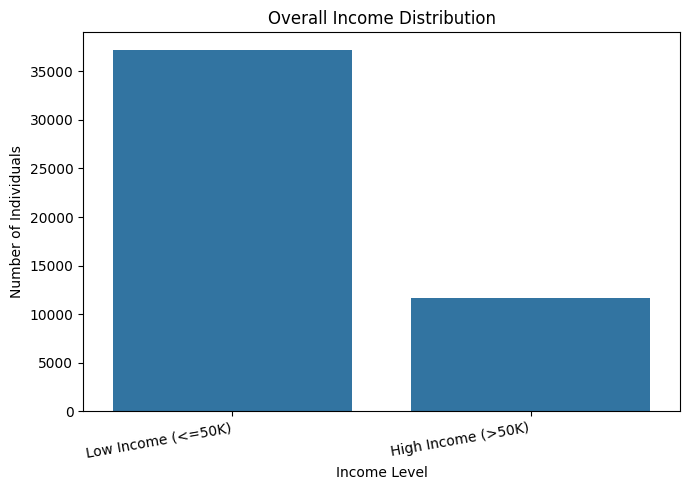

In [17]:
# Calculate Counts
income_counts = df['income_label'].value_counts()
print("Total Counts:")
print(income_counts)
print("-" * 20)

# Calculate Percentages
income_percentages = df['income_label'].value_counts(normalize=True) * 100
print("Percentages:")
print(income_percentages.round(2))
print("-" * 20)

# Plot Overall Distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='income_label', order=income_counts.index)
plt.title('Overall Income Distribution')
plt.xlabel('Income Level')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()



--- 2. Income Distribution by Sex ---
Counts by sex and Income Level:
income_label  High Income (>50K)  Low Income (<=50K)
sex                                                 
Female                      1769               14423
Male                        9918               22732
--------------------
Percentages within each sex group:
income_label  High Income (>50K)  Low Income (<=50K)
sex                                                 
Female                     10.93               89.07
Male                       30.38               69.62
--------------------


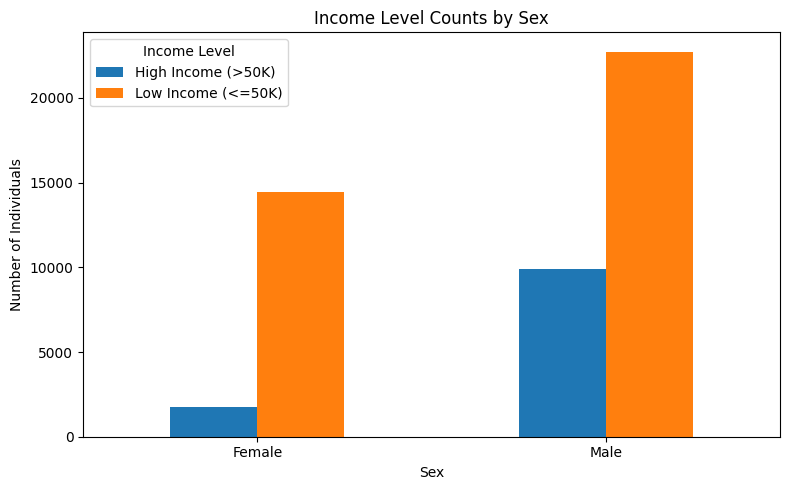

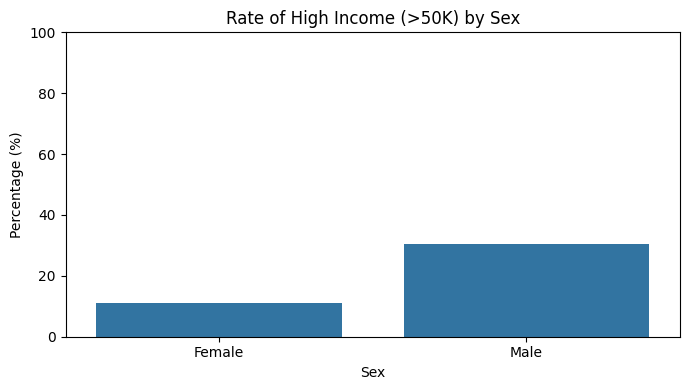

In [19]:
# --- 2. Analysis by Sex ---
print(f"\n--- 2. Income Distribution by {sex_col.capitalize()} ---")

# Calculate Counts by Sex and Income
sex_income_counts = df.groupby(sex_col)['income_label'].value_counts().unstack(fill_value=0)
print(f"Counts by {sex_col} and Income Level:")
print(sex_income_counts)
print("-" * 20)

# Calculate Percentages within each Sex group
sex_income_percentages = df.groupby(sex_col)['income_label'].value_counts(normalize=True).unstack(fill_value=0) * 100
print(f"Percentages within each {sex_col} group:")
print(sex_income_percentages.round(2))
print("-" * 20)

# Plot Counts by Sex
sex_income_counts.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title(f'Income Level Counts by {sex_col.capitalize()}')
plt.xlabel(sex_col.capitalize())
plt.ylabel('Number of Individuals')
plt.legend(title='Income Level')
plt.tight_layout()
plt.show()

# Plot Percentages (Rate of Target Outcome) by Sex
if target_outcome_for_rates in sex_income_percentages.columns:
    sex_target_outcome_rate = sex_income_percentages[target_outcome_for_rates]
    plt.figure(figsize=(7, 4))
    sns.barplot(x=sex_target_outcome_rate.index, y=sex_target_outcome_rate.values)
    plt.title(f'Rate of {target_outcome_for_rates} by {sex_col.capitalize()}')
    plt.xlabel(sex_col.capitalize())
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()
else:
    print(f"Warning: Cannot plot target outcome rate by {sex_col} - label '{target_outcome_for_rates}' not found in columns: {sex_income_percentages.columns}.")


--- 3. Income Distribution by Race ---
Counts by race and Income Level:
income_label        High Income (>50K)  Low Income (<=50K)
race                                                      
Amer-Indian-Eskimo                  55                 415
Asian-Pac-Islander                 409                1110
Black                              566                4119
Other                               50                 356
White                            10607               31155
--------------------
Percentages within each race group:
income_label        High Income (>50K)  Low Income (<=50K)
race                                                      
Amer-Indian-Eskimo               11.70               88.30
Asian-Pac-Islander               26.93               73.07
Black                            12.08               87.92
Other                            12.32               87.68
White                            25.40               74.60
--------------------


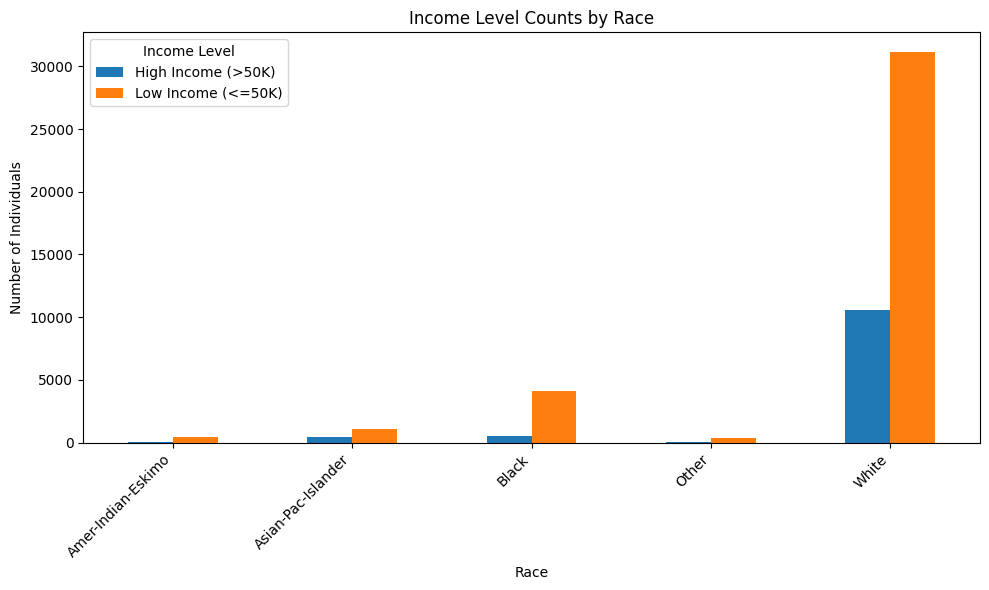

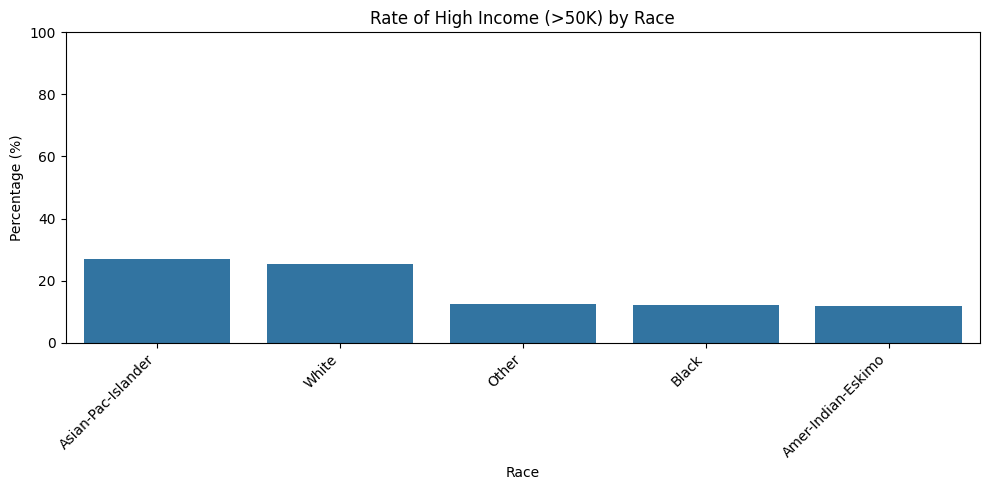

In [21]:
print(f"\n--- 3. Income Distribution by {race_col.capitalize()} ---")

# Calculate Counts by Race and Income
race_income_counts = df.groupby(race_col)['income_label'].value_counts().unstack(fill_value=0)
print(f"Counts by {race_col} and Income Level:")
print(race_income_counts)
print("-" * 20)

# Calculate Percentages within each Race group
race_income_percentages = df.groupby(race_col)['income_label'].value_counts(normalize=True).unstack(fill_value=0) * 100
print(f"Percentages within each {race_col} group:")
print(race_income_percentages.round(2))
print("-" * 20)

# Plot Counts by Race
race_income_counts.plot(kind='bar', figsize=(10, 6))
plt.title(f'Income Level Counts by {race_col.capitalize()}')
plt.xlabel(race_col.capitalize())
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Level')
plt.tight_layout()
plt.show()

# Plot Percentages (Rate of Target Outcome) by Race
if target_outcome_for_rates in race_income_percentages.columns:
    race_target_outcome_rate = race_income_percentages[target_outcome_for_rates].sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=race_target_outcome_rate.index, y=race_target_outcome_rate.values)
    plt.title(f'Rate of {target_outcome_for_rates} by {race_col.capitalize()}')
    plt.xlabel(race_col.capitalize())
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


--- 4. Income Distribution by Age Group ---
Created Age Groups: ['<25', '25-35', '36-45', '46-55', '55+']
Counts by Age Group and Income Level:
income_label  High Income (>50K)  Low Income (<=50K)
age_group                                           
<25                           93                8339
25-35                       2115               10462
36-45                       4059                8134
46-55                       3455                5316
55+                         1965                4904
--------------------
Percentages within each Age Group:
income_label  High Income (>50K)  Low Income (<=50K)
age_group                                           
<25                         1.10               98.90
25-35                      16.82               83.18
36-45                      33.29               66.71
46-55                      39.39               60.61
55+                        28.61               71.39
--------------------


C:\Users\debru004\AppData\Local\Temp\ipykernel_8312\2321979834.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_counts = df.groupby('age_group')['income_label'].value_counts().unstack(fill_value=0)
C:\Users\debru004\AppData\Local\Temp\ipykernel_8312\2321979834.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_percentages = df.groupby('age_group')['income_label'].value_counts(normalize=True).unstack(fill_value=0) * 100


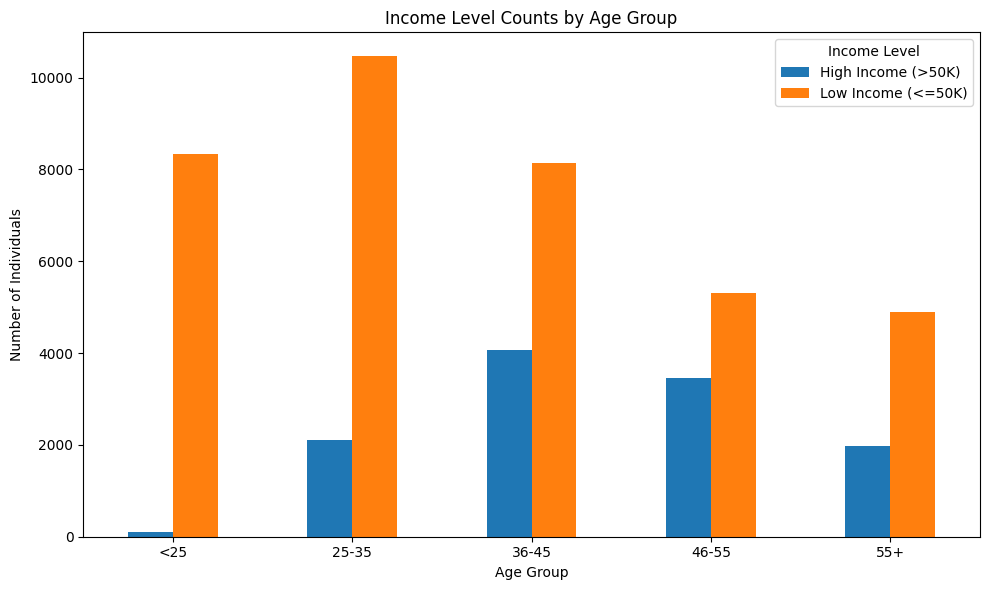

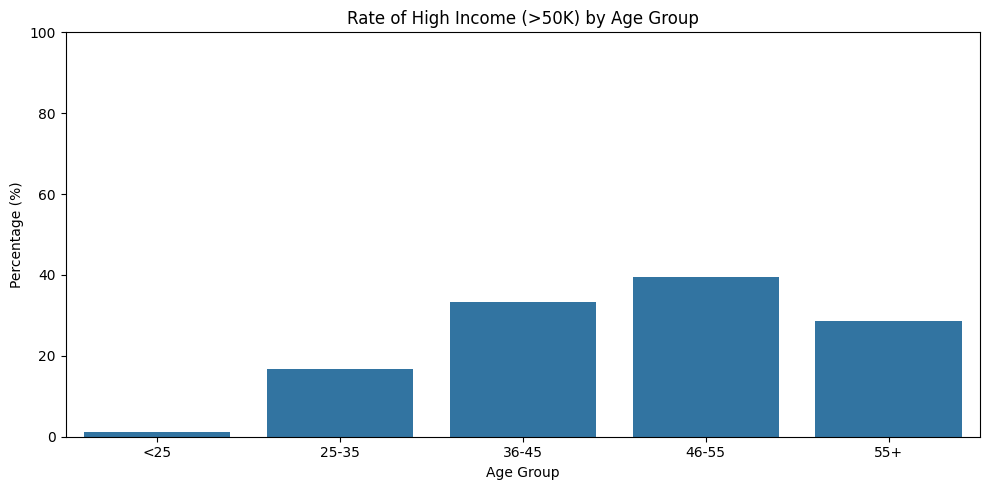

In [22]:
print("\n--- 4. Income Distribution by Age Group ---")

# Create Age Groups (Example: <25, 25-35, 36-45, 46-55, 55+) - Adjust bins as needed!
age_bins = [0, 25, 35, 45, 55, df[age_col].max() + 1]
age_labels = ['<25', '25-35', '36-45', '46-55', '55+']
df['age_group'] = pd.cut(df[age_col], bins=age_bins, labels=age_labels, right=False)

print(f"Created Age Groups: {age_labels}")

# Calculate Counts by Age Group and Income
age_income_counts = df.groupby('age_group')['income_label'].value_counts().unstack(fill_value=0)
print("Counts by Age Group and Income Level:")
print(age_income_counts)
print("-" * 20)

# Calculate Percentages within each Age Group
age_income_percentages = df.groupby('age_group')['income_label'].value_counts(normalize=True).unstack(fill_value=0) * 100
print("Percentages within each Age Group:")
print(age_income_percentages.round(2))
print("-" * 20)

# Plot Counts by Age Group
age_income_counts.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Income Level Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.legend(title='Income Level')
plt.tight_layout()
plt.show()

# Plot Percentages (Rate of Target Outcome) by Age Group
if target_outcome_for_rates in age_income_percentages.columns:
    age_target_outcome_rate = age_income_percentages[target_outcome_for_rates]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=age_target_outcome_rate.index, y=age_target_outcome_rate.values)
    plt.title(f'Rate of {target_outcome_for_rates} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

In [23]:
# Sex Distribution
if sex_col in df.columns:
    sex_distribution_pct = df[sex_col].value_counts(normalize=True).mul(100).round(2)
    print(f"\n{sex_col.capitalize()} Distribution (%):")
    print(sex_distribution_pct)
else:
    print(f"\nWarning: Column '{sex_col}' not found. Cannot calculate sex distribution.")

# Race Distribution
if race_col in df.columns:
    race_distribution_pct = df[race_col].value_counts(normalize=True).mul(100).round(2)
    print(f"\n{race_col.capitalize()} Distribution (%):")
    print(race_distribution_pct)
else:
    print(f"\nWarning: Column '{race_col}' not found. Cannot calculate race distribution.")

print("-" * 30)


Sex Distribution (%):
sex
Male      66.85
Female    33.15
Name: proportion, dtype: float64

Race Distribution (%):
race
White                 85.50
Black                  9.59
Asian-Pac-Islander     3.11
Amer-Indian-Eskimo     0.96
Other                  0.83
Name: proportion, dtype: float64
------------------------------


In [25]:
age_group_col_name = 'age_group'

if age_group_col_name in df.columns:
    age_group_distribution_pct = df[age_group_col_name].value_counts(normalize=True).mul(100).round(2)
    # Sort by index (the age group labels) to ensure logical order
    age_group_distribution_pct = age_group_distribution_pct.sort_index()
    print(f"\n{age_group_col_name.replace('_', ' ').capitalize()} Distribution (%):")
    print(age_group_distribution_pct)
else:
    print(f"\nWarning: Column '{age_group_col_name}' not found. Cannot calculate age group distribution.")
    if age_col in df.columns:
        print(f"Hint: You might need to create the '{age_group_col_name}' column first using pd.cut() on the '{age_col}' column.")
    else:
        print(f"Hint: The base '{age_col}' column also seems to be missing.")


Age group Distribution (%):
age_group
<25      17.26
25-35    25.75
36-45    24.96
46-55    17.96
55+      14.06
Name: proportion, dtype: float64
